### **Conversational CHATBOT to refresh your mind**:

**Necessary Installations:**

In [0]:
import sys
python = sys.executable

# In your environment run:
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy];

Requirement already up-to-date: rasa_core==0.9.6 in /usr/local/lib/python3.6/dist-packages (0.9.6)
Requirement already up-to-date: rasa_nlu[spacy] in /usr/local/lib/python3.6/dist-packages (0.14.4)


In [0]:
!{python} -m pip install -U rasa_core_sdk

Requirement already up-to-date: rasa_core_sdk in /usr/local/lib/python3.6/dist-packages (0.12.2)


**Installation of Eng language model via spaCy:**

In [0]:
!{python} -m spacy download en_core_web_md


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [0]:
!{python} -m spacy link en_core_web_md en --force;


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



**Import RASA NLU and CORE with some other necessary imports:**

In [0]:
import rasa_nlu
import rasa_core
import spacy

In [0]:
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
python = sys.executable

%matplotlib inline

**Lets start our work:**

**1.) UNDERSTAND USER'S INPUT**


►**Write Intent Classification file(training_file):**

In [0]:
nlu_md = """
## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad

## intent: mood_sleepy
- I need some sleep
- need some sleep
- kind of feeling nap
- it's my nap-time
- I should sleep.Will be exams tomorrow.

## intent: inform
- A [husband_wife](jokes:husband_wife) kind of jokes
- A [teacher](jokes:teacher) jokes
- A [father](jokes:father) jokes
- A [husband_wife](jokes:husband_wife) will definitely make me laugh
- A [teacher](jokes:teacher) will definitely make me laugh 
- A [father](jokes:father) jokes definitely make me laugh
- I am fan of [father](jokes:father) jokes
- I am fan of [husband_wife](jokes:husband_wife) jokes
- I am fan of [teacher](jokes:teacher) jokes
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


►**Define NLU model configuration:**

In [0]:
config = """

language: "en"

pipeline:
- name: "nlp_spacy"
- name: "tokenizer_spacy"
- name: "ner_crf"
- name: "intent_featurizer_spacy"
- name: "intent_classifier_sklearn"
- name: "ner_synonyms"

"""

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


►**Input of training file into model configuration pipeline:**

In [0]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu import config
from rasa_nlu.model import Trainer

In [0]:
training_data=load_data("nlu.md")

trainer=Trainer(config.load("config.yml"))

interpreter=trainer.train(training_data)

model_directory=trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 81 (8 distinct intents)
	- Found intents: 'inform', 'greet', 'mood_sleepy', 'mood_unhappy', 'mood_deny', 'mood_great', 'mood_affirm', 'goodbye'
	- entity examples: 9 (1 distinct entities)
	- found entities: 'jokes'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Star

Fitting 2 folds for each of 6 candidates, totalling 12 fits


INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


 ►**Test your training model:**

In [0]:
def pprint(o):
    print(json.dumps(o,indent=2))


pprint(interpreter.parse("I want to try a father jokes "))

{
  "intent": {
    "name": "inform",
    "confidence": 0.33012242189056423
  },
  "entities": [
    {
      "start": 16,
      "end": 22,
      "value": "father",
      "entity": "jokes",
      "confidence": 0.9652290885438746,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "inform",
      "confidence": 0.33012242189056423
    },
    {
      "name": "goodbye",
      "confidence": 0.15332761499547173
    },
    {
      "name": "mood_great",
      "confidence": 0.13159608415013385
    },
    {
      "name": "mood_unhappy",
      "confidence": 0.11170078894706005
    },
    {
      "name": "greet",
      "confidence": 0.10664917417409107
    },
    {
      "name": "mood_sleepy",
      "confidence": 0.06456937930382979
    },
    {
      "name": "mood_deny",
      "confidence": 0.05444139607471961
    },
    {
      "name": "mood_affirm",
      "confidence": 0.04759314046412972
    }
  ],
  "text": "I want to try a father jokes "
}


**2.)Teach your Bot 'How to reply on user's Input':**

►**Write Conversational Flow  **

In [0]:
stories_md = """
## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy
* mood_affirm
  - utter_goodbye

## sad path_1
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"teacher"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye
  
## sad path _2
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_deny
  - utter_ask_again
* mood_deny
  -utter_goodbye
  
## sad path_3
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_deny  
  - utter_ask_again
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"teacher"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye
  
## sad path_4
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"husband_wife"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye
  
## sad path_5
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_deny  
  - utter_ask_again
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"husband_wife"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye

## sad path_6
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"father"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye
  
## sad path_7
* greet
  - utter_greet
* mood_unhappy
  - utter_ask_joke
* mood_deny  
  - utter_ask_again
* mood_affirm
  - utter_which_kind_joke
* inform{"jokes":"father"}
  - action_retrive_joke
  - utter_did_that_help
* mood_affirm
  - utter_happy
* goodbye
  - utter_goodbye  
  
## strange user
* greet
  - utter_greet
* mood_sleepy
  - utter_good_night
* goodbye
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## fallback
- utter_unclear

"""
%store stories_md > stories.md
  


Writing 'stories_md' (str) to file 'stories.md'.


►**Define Domain of the BOT(heart of the bot)**

In [0]:
domain_yml="""

intents:
- greet
- mood_great
- mood_unhappy
- goodbye
- mood_affirm
- mood_deny
- mood_sleepy
- inform

slots:
  jokes:
    type: text

entities:
- jokes

actions:
- utter_greet
- utter_happy
- utter_goodbye
- utter_did_that_help
- utter_unclear
- utter_ask_joke
- utter_good_night
- utter_ask_again
- utter_ask_another_joke
- utter_sorry
- utter_which_kind_joke
- actions.JokeTelling

templates:
  utter_greet:
  - text: "Hey!what's up buddy?"
  utter_happy:
  - text: "Very nice buddy!Keep it up"
  utter_goodbye:
  - text: "Meet u soon!"
  utter_did_that_help:
  - text: "Is it good for you now?"
  utter_ask_again:
  - text: "Do you really don't want to hear any of them?"
  utter_sorry:
  - text: "I'm really sorry but I can't help further."
  utter_ask_another_joke:
  - text: "Do you want to hear another joke from me?"
  utter_unclear:
  - text: "I'm not getting you...."
  utter_ask_joke:
  - text: "I can tell you some jokes if it would help to cheer you up..Would you like to hear any joke?"
  utter_good_night:
  - text: "Good night..sleep well and have a lovely dream"
  utter_which_kind_joke:
  - text: "Which kind of joke would you like to listen?"
    buttons:
    - title: 'teacher'
      payload: '/inform{"jokes":"teacher"}'
    - title: 'husband_wife'
      payload: '/inform{"jokes":"husband_wife"}'
    - title:  'father'
      payload: '/inform{"jokes":"father"}'
"""
%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


►**Visualization of training data**

In [0]:
from IPython.core.display import Image, display

In [0]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz

!{python} -m pip install pygraphviz;

/bin/bash: breq: command not found


Processed Story Blocks: 100%|██████████| 11/11 [00:00<00:00, 265.42it/s, # trackers=1]


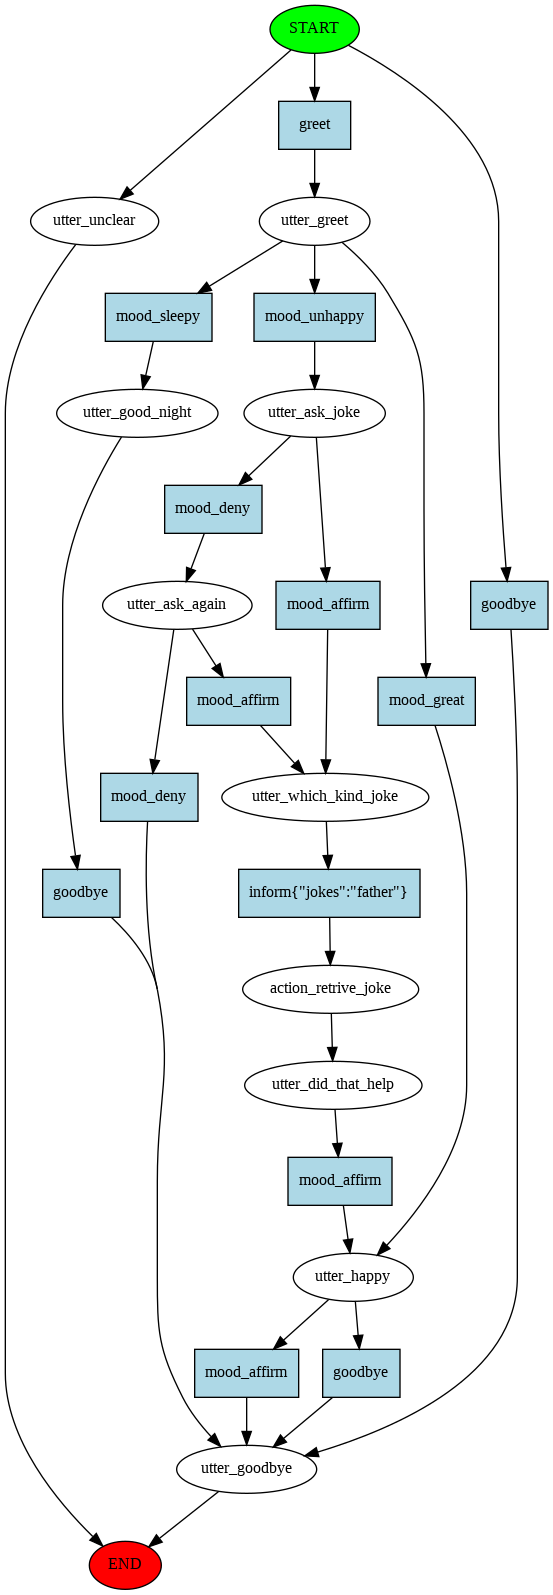

In [0]:
from rasa_core.agent import Agent

agent = Agent('domain.yml')
agent.visualize("stories.md", "story_graph.png", max_history=5)
Image(filename="story_graph.png")

►**Training of Dialogue Model(Policy Selection)**

In [0]:

from rasa_core.policies import FallbackPolicy, KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

fallback=FallbackPolicy(fallback_action_name="utter_unclear",
                        core_threshold=0.2,
                        nlu_threshold=0.35)
agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy(), fallback])

training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=300
)

agent.persist('models/dialogue')

Processed Story Blocks: 100%|██████████| 11/11 [00:00<00:00, 145.72it/s, # trackers=10]
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 194/194 [00:11<00:00, 16.43it/s, # actions=193]
INFO:rasa_core.featurizers:Created 193 action examples.
Processed actions: 193it [00:00, 327.81it/s, # examples=193]
INFO:rasa_core.policies.memoization:Memorized 193 unique action examples.
INFO:rasa_core.featurizers:Creating states and action examples from collected trackers (by MaxHistoryTrackerFeaturizer)...
Processed trackers: 100%|██████████| 194/194 [00:11<00:00, 15.70it/s, # actions=193]
INFO:rasa_core.featurizers:Created 193 action examples.
INFO:rasa_core.policies.keras_policy:Fitting model with 193 total samples and a validation split of 0.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 5, 24)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                7296      
_________________________________________________________________
dense_2 (Dense)              (None, 14)                462       
_________________________________________________________________
activation_2 (Activation)    (None, 14)                0         
Total params: 7,758
Trainable params: 7,758
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
193/193 [==============================] - 1s 3ms/step - loss: 2.5299 - acc: 0.3368
Epoch 2/300
193/193 [==============================] - 0s 230us/step - loss: 2.3945 - acc: 0.4767
Epoch 3/300
193/193 [==============================] - 0s 223us/step - loss: 2

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model
INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to '/content/models/dialogue'


►**Starting of bot**

In [0]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [0]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print(response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
hello 
Hey!what's up buddy?
i am sad
I can tell you some jokes if it would help to cheer you up..Would you like to hear any joke?
yes
Which kind of joke would you like to listen?
/inform{"jokes":"father"}
I have something really funny for you:Son: Mom, yesterday when I was on the bus with dad, dad told me to give up my seat to a lady.Mom: Good, you have done the right thing.Son: But mom I was sitting on dad's lap.
Is it good for you now?
yes, i am good now
I'm not getting you....
i am good
Very nice buddy!Keep it up
Bye
Meet u soon!
stop
